In [1]:
import pandas as pd
from RoutePlanner.Optimisation import TravelTime
from RoutePlanner import Plot
from RoutePlanner.TemporalCellGrid import TemporalCellGrid
import pickle

In [2]:
OptInfo = {}

# Mesh Information
OptInfo['Mesh']  = {}
OptInfo['Mesh']['Longitude Bounds (Min,Max,Width)']      = [-130,30,5]
OptInfo['Mesh']['Latitude Bounds (Min,Max,Width)']       = [-80,-40,2.5]

OptInfo['Mesh']['Date Range (Min,Max,dT)']               = ['2013-01-1','2013-01-30',1.0]
OptInfo['Mesh']['Homogenous Params (Threshold,Min,Max)'] = [0.25,0.05,0.95] #[0.04,0.05,0.85] - Slow Vehicle, [0.12,0.05,0.85] - SDA
OptInfo['Mesh']['Current Data Path']                     = "../../Data/SOSE_surface_velocity_6yearMean_2005-2010.nc"
OptInfo['Mesh']['Ice Data Path']                         = "../../Data/bsose_i122_2013to2017_1day_SeaIceArea.nc"

# Route Information
OptInfo['Route'] = {} 
OptInfo['Route']['WayPoints']            = '../../resources/WayPoints_org.csv'
OptInfo['Route']['MaxIceExtent']         = 0.8
OptInfo['Route']['Zero Currents']        = True
OptInfo['Route']['VariableSpeed']        = False
OptInfo['Route']['Time Unit']            = 'days'

OptInfo['Route']['VehicleInfo']                = {}
OptInfo['Route']['VehicleInfo']['Speed']       = 26.5
OptInfo['Route']['VehicleInfo']['Unit']        = 'km/hr'
OptInfo['Route']['VehicleInfo']['Beam']        = 24.0
OptInfo['Route']['VehicleInfo']['HullType']    = 'slender'
OptInfo['Route']['VehicleInfo']['ForceLimit']  = 96634.5


In [3]:
# # Generating Cell Grid
# temporalCellGrid = TemporalCellGrid(OptInfo)
# cellGrid         = temporalCellGrid.range(OptInfo['Mesh']['Date Range (Min,Max,dT)'][0],OptInfo['Mesh']['Date Range (Min,Max,dT)'][1],j_grid=True)
# cellGrid.iterativeSplit(0)
# with open('cellGrid.p', 'wb') as f:
#     pickle.dump(cellGrid,f)

with open('cellGrid.p', 'rb') as f:
    cellGrid = pickle.load(f)

In [4]:
# Difference - Land Mesh
cellGrid.cellBoxes[206].landLocked = True

In [5]:
#cellGrid.plot()

map = Plot.BaseMap(logo=True,logoPos=[5,88])
map = Plot.MapMesh(cellGrid,map)
map = Plot.MapWaypoints(pd.read_csv(OptInfo['Route']['WayPoints']),map)
map = Plot.LayerControl(map,collapsed=True)
map

/Users/jsmith/miniconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/jsmith/Documents/Research/Researcher_BAS/RoutePlanning/SDADT-pyRoutePlanner/RoutePlanner/IO.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Polygons['Land'][np.isnan(Polygons['Ice Area'])] = True


In [28]:
TT = TravelTime(cellGrid,OptInfo)
Paths = TT.Paths(source_waypoints=['MargueriteBay'],end_waypoints=['Brunt'],verbose=True,multiprocessing=False)
#Paths = TT.Paths(verbose=True,multiprocessing=False)
with open('Paths.p', 'wb') as f:
    pickle.dump(TT,f)

# with open('Paths.p', 'rb') as f:
#     TT = pickle.load(f)

Zero Currets True
=== Processing Waypoint = MargueriteBay ===


/Users/jsmith/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/jsmith/miniconda3/lib/python3.9/site-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()
/Users/jsmith/Documents/Research/Researcher_BAS/RoutePlanning/SDADT-pyRoutePlanner/RoutePlanner/Optimisation.py:183: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

In [29]:
map = Plot.BaseMap(logo=True,logoPos=[5,88])
map = Plot.MapMesh(cellGrid,map,threshold=OptInfo['Route']['MaxIceExtent'])
map = Plot.MapWaypoints(pd.read_csv(OptInfo['Route']['WayPoints']),map)
map = Plot.MapPaths(Paths,map,PathPoints=False)
map = Plot.LayerControl(map,collapsed=True)
map

/Users/jsmith/miniconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/jsmith/Documents/Research/Researcher_BAS/RoutePlanning/SDADT-pyRoutePlanner/RoutePlanner/IO.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Polygons['Land'][np.isnan(Polygons['Ice Area'])] = True


In [42]:
import numpy as np
from shapely.geometry import Polygon

class _Euclidean_distance():
    """
    Replicating original route planner Euclidean distance 
    Inputs:
      origin      - tuple of floats e.g. (Long_orig,Lat_orig)
      destination - tuple of floats e.g. (Long_dest,Lat_dest)
      Optional: forward - Boolean True or False
    Output:
      Value - If 'forward' is True then returns Distance between 
              two points in 'km'. If 'False' then return the 
              Lat/Long position of a point.

    """

    def __init__(self,scaleLongitude=None):

        self.m_per_latitude  = 111.386*1000.

        if type(scaleLongitude) != type(None):
            self.m_per_longitude = 111.321*1000*np.cos(scaleLongitude)#*(np.pi/180))
        else:
            self.m_per_longitude = (111.321*1000.)

    def value(self,origin,dest_dist,forward=True):
        lon1,lat1 = origin
        if forward:
            lon2,lat2 = dest_dist
            lon2 = lon2#+360
            lon1 = lon1#+360
            val = np.sqrt(((lat2-lat1)*self.m_per_latitude)**2 + ((lon2-lon1)*self.m_per_longitude)**2)
        else:
            dist_x,dist_y = dest_dist        
            val = [lon1+(dist_x/self.m_per_longitude),lat1+(dist_y/self.m_per_latitude)]
        return val

class NewtonianCurve:
    def __init__(self,Mesh,DijkstraInfo,OptInfo,unit_shipspeed='km/hr',unit_time='days',debugging=0,maxiter=10000,pathIter=1000,optimizer_tol=1e-6,minimumDiff=1e-6,zerocurrents=True):
        '''
        
        
            BUG:
                - Currently the speed is fixed. Move the construction of the cellBox speed to a function of the cellBox
        
        '''

        # Passing the Mesh information
        self.Mesh = Mesh

        # Passing the Dijkstra Graph
        self.DijkstraInfo = copy.copy(DijkstraInfo)

        # Passing the optional Information
        self.OptInfo = OptInfo

        
        # Inside the code the base units are m/s. Changing the units of the inputs to match
        self.unit_shipspeed = unit_shipspeed
        self.unit_time      = unit_time
        self.s              = self._unit_speed(26.3)
        
        # Information for distance metrics
        self.R              = 6371.5*1000.
        self.fdist          = _Euclidean_distance()

        # Optimisation Information
        self.maxiter       = maxiter
        self.pathIter      = pathIter
        self.optimizer_tol = optimizer_tol
        self.minimumDiff   = minimumDiff
        self._epsilon      = 1e-6


        # For Debugging purposes 
        self.debugging     = debugging

        # zeroing currents if flagged
        if zerocurrents:
            self.zc = 0.0
        else:
            self.zc = 1.0

    def _unit_speed(self,Val):
        if self.unit_shipspeed == 'km/hr':
            Val = Val*(1000/(60*60))
        if self.unit_shipspeed == 'knots':
            Val = (Val*0.51)
        return Val

    def _unit_time(self,Val):
        if self.unit_time == 'days':
            Val = Val/(60*60*24)
        elif self.unit_time == 'hr':
            Val = Val/(60*60)
        elif self.unit_time == 'min':
            Val = Val/(60)
        elif self.unit_time == 's':
            Val = Val
        return Val

    def _long_case(self):
            def NewtonOptimisationLong(f,df,y0,x,a,Y,u1,v1,u2,v2,s,R,λ_s,φ_r):
                    tryNum=1
                    iter=0
                    if self.maxiter > 0:
                        while iter < self.maxiter:
                            # # -- Maria Original
                            # if (iter>100) and (tryNum==1):
                            #     y0 = (Y*x)/(x+a)
                            #     tryNum+=1
                            # if (iter>200) and (tryNum>=2) and (tryNum <10):
                            #     tryNum+=1
                            #     iter-=100
                            #     if (Y<0):
                            #         if v2>v1:
                            #             y0 = (tryNum-2)*Y
                            #         else:
                            #             y0 = (tryNum-3)*-Y
                            #     else:
                            #         if v2<v1:
                            #             y0 = (tryNum-2)*Y
                            #         else:
                            #             y0 = (tryNum-3)*-Y        

                            F,X1,X2  = f(y0,x,a,Y,u1,v1,u2,v2,s,R,λ_s,φ_r)
                            dF = df(y0,x,a,Y,u1,v1,u2,v2,s,R,λ_s,φ_r)
                            imprving = (abs(dF)>1) or ((abs(dF) > self._epsilon*(X1*X2)) and (abs(dF)/iter) > self._epsilon)
                            if not imprving:
                                break
                            y0  -= (F/dF)
                            iter+=1
                    return y0

            def _F(y,x,a,Y,u1,v1,u2,v2,s,R,λ_s,φ_r):
                θ  = (y/R + λ_s)*(np.pi/180)
                zl = x*np.cos(θ)
                ψ  = (-(Y-y)/R + φ_r)*(np.pi/180)
                zr = a*np.cos(ψ)

                C1  = s**2 - u1**2 - v1**2
                C2  = s**2 - u2**2 - v2**2
                D1  = zl*u1 + y*v1
                D2  = zr*u2 + (Y-y)*v2
                X1  = np.sqrt(D1**2 + C1*(zl**2 + y**2))
                X2  = np.sqrt(D2**2 + C2*(zr**2 + (Y-y)**2))

                dzr = -zr*np.sin(ψ)/R
                dzl = -zl*np.sin(θ)/R

                zr_term = (zr - (X2 - D2)*u2/C2)
                zl_term = (zl - (X1 - D1)*u1/C1)
                F = (X1+X2)*y - v1*(X1-D1)*X2/C1 - (Y - v2*(X2-D2)/C2)*X1 + dzr*zr_term*X1 + dzl*zl_term*X2
                return F,X1,X2

            def _dF(y,x,a,Y,u1,v1,u2,v2,s,R,λ_s,φ_r):
                θ  = (y/R +  λ_s)*(np.pi/180)
                zl = x*np.cos(θ)
                ψ  = (-(Y-y)/R + φ_r)*(np.pi/180)
                zr = a*np.cos(ψ)

                C1  = s**2 - u1**2 - v1**2
                C2  = s**2 - u2**2 - v2**2
                D1  = zl*u1 + y*v1
                D2  = zr*u2 + (Y-y)*v2
                X1  = np.sqrt(D1**2 + C1*(zl**2 + y**2))
                X2  = np.sqrt(D2**2 + C2*(zr**2 + (Y-y)**2))

                dzr = -zr*np.sin(ψ)/R
                dzl = -zl*np.sin(θ)/R

                dD1 = dzl*u1 + v1
                dD2 = dzr*u2 - v2
                dX1 = (D1*v1 + C1*y + dzl*(D1*u1 + C1*zl))/X1
                dX2 = (-v2*D2 - C2*(Y-y) + dzr*(D2*u2 + C2*zr))/X2        

                zr_term = (zr - (X2 - D2)*u2/C2)
                zl_term = (zl - (X1 - D1)*u1/C1)

                dF = (X1+X2) + y*(dX1 + dX2) - (v1/C1)*(dX2*(X1-D1) + X2*(dX1-dD1))\
                    + (v2/C2)*(dX1*(X2-D2) + X1*(dX2-dD2))\
                    - Y*dX1 - (zr/(R**2))*zr_term*X1\
                    - (zl/(R**2))*zl_term*X2\
                    + dzr*(dzr-u2*(dX2-dD2))/C2*X1\
                    + dzl*(dzl-u1*(dX1-dD1))/C1*X2\
                    + dzr*zr_term*dX1 + dzl*zl_term*dX2
                return dF 

            Cp = tuple(self.triplet[['cX','cY']].iloc[1])
            if self.triplet.iloc[1].case == 2:   
                Sp   = tuple(self.triplet.iloc[0][['cX','cY']])
                Np   = tuple(self.triplet.iloc[2][['cX','cY']])
                Box1 = self.Mesh.cellBoxes[self.triplet.iloc[1]['cellStart'].name]
                Box2 = self.Mesh.cellBoxes[self.triplet.iloc[1]['cellEnd'].name]
                sgn  = 1
            else:
                Sp   = tuple(self.triplet.iloc[2][['cX','cY']])
                Np   = tuple(self.triplet.iloc[0][['cX','cY']])
                Box1 = self.Mesh.cellBoxes[self.triplet.iloc[1]['cellEnd'].name]
                Box2 = self.Mesh.cellBoxes[self.triplet.iloc[1]['cellStart'].name]
                sgn  = -1

            λ_s  = Sp[1]
            φ_r  = Np[1]

            x           = self.fdist.value(Sp,(Cp[0],Sp[1]))
            a           = self.fdist.value(Np,(Cp[0],Np[1]))

            Y           = np.sign(Np[1]-Sp[1])*self.fdist.value((Np[0],Sp[1]),(Np[0],Np[1]))
            y0          = np.sign(Cp[1]-Sp[1])*self.fdist.value((Cp[0],Sp[1]),(Cp[0],Cp[1]))

            u1          = sgn*self.zc*Box1.getuC(); v1 = self.zc*Box1.getvC()
            u2          = sgn*self.zc*Box2.getuC(); v2 = self.zc*Box2.getvC()
            y           = NewtonOptimisationLong(_F,_dF,y0,x,a,Y,u1,v1,u2,v2,self.s,self.R,λ_s,φ_r)

            # Updating the crossing points
            CrossP = self.fdist.value((Cp[0],Sp[1]),(0.0,y),forward=False)
            self.triplet['cX'].iloc[1] = CrossP[0]
            self.triplet['cY'].iloc[1] = CrossP[1]

    def _lat_case(self):
        def NewtonOptimisationLat(f,df,y0,x,a,Y,u1,v1,u2,v2,s,R,λ,θ,ψ):
                tryNum=1
                iter=0
                if self.maxiter > 0:
                    while iter < self.maxiter:
                        # -- Maria Original
                        if (iter>100) and (tryNum==1):
                            y0 = (Y*x)/(x+a)
                            tryNum+=1
                        if (iter>200) and (tryNum>=2) and (tryNum <10):
                            tryNum+=1
                            iter-=100
                            if (Y<0):
                                if v2>v1:
                                    y0 = (tryNum-2)*Y
                                else:
                                    y0 = (tryNum-3)*-Y
                            else:
                                if v2<v1:
                                    y0 = (tryNum-2)*Y
                                else:
                                    y0 = (tryNum-3)*-Y        

                        # --- Updating ---
                        F,X1,X2  = f(y0,x,a,Y,u1,v1,u2,v2,s,R,λ,θ,ψ)
                        dF = df(y0,x,a,Y,u1,v1,u2,v2,s,R,λ,θ,ψ)
                        imprving = (abs(dF)>1) or ((abs(dF) > self._epsilon*(X1*X2)) and (abs(dF)/iter) > self._epsilon)
                        if not imprving:
                            break
                        y0 -= (F/dF)

                        iter +=1

                return y0

        def _F(y,x,a,Y,u1,v1,u2,v2,s,R,λ,θ,ψ):
            λ   = λ*(np.pi/180)
            ψ   = ψ*(np.pi/180)
            θ   = θ*(np.pi/180)
            r1  = np.cos(λ)/np.cos(θ)
            r2  = np.cos(ψ)/np.cos(θ)

            d1  = np.sqrt(x**2 + (r1*y)**2)
            d2  = np.sqrt(a**2 + (r2*(Y-y))**2)
            C1  = s**2 - u1**2 - v1**2
            C2  = s**2 - u2**2 - v2**2
            D1  = x*u1 + r1*v1*y
            D2  = a*u2 + r2*v2*(Y-y)
            X1  = np.sqrt(D1**2 + C1*(d1**2))
            X2  = np.sqrt(D2**2 + C2*(d2**2)) 



            F = ((r2**2)*X1 + (r1**2)*X2)*y - ((r1*(X1-D1)*X2*v1)/C1) - r2*(r2*Y-v2*(X2-D2)/C2)*X1

            return F,X1,X2

        def _dF(y,x,a,Y,u1,v1,u2,v2,s,R,λ,θ,ψ):
            λ   = λ*(np.pi/180)
            ψ   = ψ*(np.pi/180)
            θ   = θ*(np.pi/180)
            r1  = np.cos(λ)/np.cos(θ)
            r2  = np.cos(ψ)/np.cos(θ)


            d1  = np.sqrt(x**2 + (r1*y)**2)
            d2  = np.sqrt(a**2 + (r2*(Y-y))**2)
            C1  = s**2 - u1**2 - v1**2
            C2  = s**2 - u2**2 - v2**2
            D1  = x*u1 + r1*v1*y
            D2  = a*u2 + r2*v2*(Y-y)
            X1  = np.sqrt(D1**2 + C1*(d1**2))
            X2  = np.sqrt(D2**2 + C2*(d2**2))   
            
            dX1 = (r1*(D1*v1 + r1*C1*y))/X1
            dX2 = (r2*(D2*v2 - r2*C2*(Y-y)))/X2


            dF = ((r2**2)*X1 + (r1**2)*X2) + y*((r2**2)*dX1 + (r1**2)*dX2)\
                - ((r1*v1)/C1)*((X1-D1)*dX2 + (dX1-r1*v1)*X2)\
                + ((r2*v2)/C2)*((X2-D2)*dX1 + (dX2+r2*v2)*X1)\
                - (r2**2)*Y*dX1
            return dF


        Cx,Cy = tuple(self.triplet[['cX','cY']].iloc[1])

        if self.triplet.iloc[1].case == -4:   
            Sx,Sy = tuple(self.triplet.iloc[0][['cX','cY']])
            Nx,Ny = tuple(self.triplet.iloc[2][['cX','cY']])
            Cl1   = self.Mesh.cellBoxes[self.triplet.iloc[1]['cellStart'].name]
            Cl2   = self.Mesh.cellBoxes[self.triplet.iloc[1]['cellEnd'].name]
            sgn   = 1
        else:
            Sx,Sy = tuple(self.triplet.iloc[2][['cX','cY']])
            Nx,Ny = tuple(self.triplet.iloc[0][['cX','cY']])
            Cl1   = self.Mesh.cellBoxes[self.triplet.iloc[1]['cellEnd'].name]
            Cl2   = self.Mesh.cellBoxes[self.triplet.iloc[1]['cellStart'].name] 
            sgn   = -1

        λ=Sy
        θ=Cy   
        ψ=Ny  

        x     = np.sign(Cy-Sy)*self.fdist.value((Sx,Sy),(Sx,Cy))
        a     = np.sign(Ny-Cy)*self.fdist.value((Nx,Ny),(Nx,Cy))
        Y     = np.sign(Nx-Sx)*self.fdist.value((Sx,Sy),(Nx,Sy))
        Su    = sgn*self.zc*Cl1.getvC(); Sv = self.zc*Cl1.getuC()
        Nu    = sgn*self.zc*Cl2.getvC(); Nv = self.zc*Cl2.getuC()
        y0    = np.sign(Cx-Sx)*self.fdist.value((Sx,Cy),(Cx,Cy))
        y     = NewtonOptimisationLat(_F,_dF,y0,x,a,Y,Su,Sv,Nu,Nv,self.s,self.R,λ,θ,ψ)

        CrossP = self.fdist.value((Sx,Cy),(y,0.0),forward=False)
        self.triplet['cX'].iloc[1] = CrossP[0]
        self.triplet['cY'].iloc[1] = CrossP[1]

    def _corner_case(self):
        '''
        '''
        # Separting out the Long/Lat of each of the points

        tuple(self.triplet.iloc[0][['cX','cY']])

        Xs,Ys = tuple(self.triplet.iloc[0][['cX','cY']])
        Xc,Yc = tuple(self.triplet.iloc[1][['cX','cY']])
        Xe,Ye = tuple(self.triplet.iloc[2][['cX','cY']])

        # === 1. Assess the cells that are shared commonly in the corner case ====
        sourceNeighbourIndices = self.triplet.iloc[1]['cellStart']
        endNeighbourIndices    = self.triplet.iloc[1]['cellEnd']
    
        commonIndices = list(set(sourceNeighbourIndices['neighbourIndex']).intersection(endNeighbourIndices['neighbourIndex']))
        CornerCells   = self.DijkstraInfo.loc[commonIndices]
        Y_line = ((Ye-Ys)/(Xe-Xs))*(Xc-Xs) + Ys

        if abs(self.triplet.iloc[1].case)==1:
            if Yc > Y_line:
                newCell = CornerCells.loc[CornerCells['cY'].idxmin()]
                if newCell.cY > Yc:
                    return
            elif Yc <= Y_line:
                newCell = CornerCells.loc[CornerCells['cY'].idxmax()]
                if newCell.cY < Yc:
                    return
        if abs(self.triplet.iloc[1].case)==3:
            if Yc >= Y_line:
                newCell = CornerCells.loc[CornerCells['cY'].idxmin()]
                if newCell.cY > Yc:
                    return                
            elif Yc < Y_line:
                newCell = CornerCells.loc[CornerCells['cY'].idxmax()]
                if newCell.cY < Yc:
                    return     


        # === 3. Return the path crossing points and cell indices
        firstCrossingPoint  = np.array(sourceNeighbourIndices['neighbourCrossingPoints'])[np.where(np.array(sourceNeighbourIndices['neighbourIndex'])==newCell.name)[0][0],:]
        secondCrossingPoint = np.array(newCell['neighbourCrossingPoints'])[np.where(np.array(newCell['neighbourIndex'])==endNeighbourIndices.name)[0][0],:]

        # Adding in the new crossing Point
        newP = pd.Series(name=self.triplet.iloc[1].name+1)
        newP['cX']        = secondCrossingPoint[0]
        newP['cY']        = secondCrossingPoint[1]
        newP['cellStart'] = newCell
        newP['cellEnd']   = copy.deepcopy(self.triplet['cellEnd'].iloc[1])
        newP['case']      = newP['cellStart']['case'][np.where(np.array(newP['cellStart']['neighbourIndex'])==newP['cellEnd'].name)[0][0]]


        # Updating the origional crossing point
        self.triplet['cX'].iloc[1]      = firstCrossingPoint[0]
        self.triplet['cY'].iloc[1]      = firstCrossingPoint[1]
        self.triplet['cellEnd'].iloc[1] = newCell 
        self.triplet['case'].iloc[1]    = self.triplet['cellStart'].iloc[1]['case'][np.where(np.array(self.triplet['cellStart'].iloc[1]['neighbourIndex'])==newCell.name)[0][0]]


        # Adding the new crossing point to the triplet
        self.CrossingDF = self.CrossingDF.append(newP,sort=True).sort_index().reset_index(drop=True)
        self.CrossingDF.index = np.arange(int(self.CrossingDF.index.min()),int(self.CrossingDF.index.max()*1e3 + 1e3),int(1e3))


    def _mergePoint(self):
        '''
            Function to merge point if on the corner 
        '''

        #1. Find indices of points that are identical
        Dist = ((self.CrossingDF['cX'][1:].to_numpy() - self.CrossingDF['cX'][:-1].to_numpy())**2 + (self.CrossingDF['cY'][1:].to_numpy() - self.CrossingDF['cY'][:-1].to_numpy())**2)
        idx = np.where(Dist<=1e-4)[0]

        
        if len(idx) != 0:
            #2. Remove the row and update thr case information and crossing point
            for id in idx:
                neighbourIndex=np.where(np.array(self.CrossingDF.iloc[id]['cellStart']['neighbourIndex'])==self.CrossingDF.iloc[id+1]['cellEnd'].name)[0][0]
                
                case = self.CrossingDF['cellStart'].iloc[id]['case'][neighbourIndex]
                crossingPoint = self.CrossingDF['cellStart'].iloc[id]['neighbourCrossingPoints'][neighbourIndex]

                if abs(case)==1 or abs(case)==3:
                    self.CrossingDF['cX'].iloc[id]      = crossingPoint[0]
                    self.CrossingDF['cY'].iloc[id]      = crossingPoint[1]
                    self.CrossingDF['cellEnd'].iloc[id] = copy.deepcopy(self.CrossingDF.iloc[id+1]['cellEnd'])
                    self.CrossingDF['case'].iloc[id] = copy.deepcopy(case)
                    self.CrossingDF = self.CrossingDF.drop(self.CrossingDF.iloc[id+1].name).sort_index().reset_index(drop=True)
                    self.CrossingDF.index = np.arange(int(self.CrossingDF.index.min()),int(self.CrossingDF.index.max()*1e3 + 1e3),int(1e3))


    def _horseshoe(self):
        '''
            1. Determine the case of the problem investigating and outline the start and end indices

            2. List the neighbours for the start and end indices that satisfy that case. 
            If they share a common neighbour then a horseshoe cannot be generated & we have an additional case.
            
            3. From those neighbours, determine their subsequent neighbours determining if any of these lists share a common entry

            4. Determine the pair that shares the common entry

            5. Re-inspect the graph adding the crossing points between this pair, adding back in the horseshoe
        '''

        # Defining the case information
        Cp        = tuple(self.triplet[['cX','cY']].iloc[1])
        Sp        = tuple(self.triplet.iloc[0][['cX','cY']])
        Np        = tuple(self.triplet.iloc[2][['cX','cY']])
        cellStart      = self.Mesh.cellBoxes[self.triplet.iloc[1]['cellStart'].name]
        cellStartGraph = self.triplet.iloc[1]['cellStart']
        cellEnd        = self.Mesh.cellBoxes[self.triplet.iloc[1]['cellEnd'].name]
        cellEndGraph   = self.triplet.iloc[1]['cellEnd']
        case           = self.triplet['case'].iloc[1]

        # Returning if corner horseshoe case type
        if abs(case)==1 or abs(case)==3 or abs(case)==0: 
            return
        elif abs(case) == 2:
            vmin = np.max([cellStart.cy-cellStart.dcy,cellEnd.cy-cellEnd.dcy])
            vmax = np.min([cellStart.cy+cellStart.dcy,cellEnd.cy+cellEnd.dcy])
            if (Cp[1] < vmax) and (Cp[1] > vmin):
                return
            if (Cp[1]>vmax):
                horseshoeCase = -4
            if (Cp[1]<vmin):
                horseshoeCase = 4
        elif abs(case) == 4:
            vmin = np.max([cellStart.cx-cellStart.dcx,cellEnd.cx-cellEnd.dcx])
            vmax = np.min([cellStart.cx+cellStart.dcx,cellEnd.cx+cellEnd.dcx])
            if (Cp[0] < vmax) and (Cp[0] > vmin):
                return
            if (Cp[0]>vmax):
                horseshoeCase = 2
            if (Cp[0]<vmin):
                horseshoeCase = -2

        # Determining the neighbours of the start and end cells that are the horseshoe case
        print(horseshoeCase,case)
        startGraphNeighbours = [cellStartGraph['neighbourIndex'][ii] for ii in list(np.where(np.array(cellStartGraph['case'])==horseshoeCase)[0])]
        endGraphNeighbours   = [cellEndGraph['neighbourIndex'][ii] for ii in list(np.where(np.array(cellEndGraph['case'])==horseshoeCase)[0])]

        for sGN in startGraphNeighbours:
            for eGN in endGraphNeighbours:
                if (np.array(self.DijkstraInfo.loc[sGN,'neighbourIndex'])==eGN).any() and (np.array(self.DijkstraInfo.loc[eGN,'neighbourIndex'])==sGN).any():
                    sGNGraph = self.DijkstraInfo.loc[sGN]
                    eGNGraph = self.DijkstraInfo.loc[eGN]

                    Crp1 = np.array(cellStartGraph['neighbourCrossingPoints'])[np.where(np.array(cellStartGraph['neighbourIndex']) == sGN)[0][0],:]
                    Crp2 = np.array(sGNGraph['neighbourCrossingPoints'])[np.where(np.array(sGNGraph['neighbourIndex']) == eGN)[0][0],:]
                    Crp3 = np.array(eGNGraph['neighbourCrossingPoints'])[np.where(np.array(eGNGraph['neighbourIndex']) == cellEndGraph.name)[0][0],:]
                    

                    # Crossing Point 2
                    Pcrp2 = pd.Series(name=self.triplet.iloc[1].name+1)
                    Pcrp2['cX']        = Crp2[0]
                    Pcrp2['cY']        = Crp2[1]
                    Pcrp2['cellStart'] = copy.deepcopy(sGNGraph)
                    Pcrp2['cellEnd']   = copy.deepcopy(eGNGraph)
                    Pcrp2['case']      = Pcrp2['cellStart']['case'][np.where(np.array(Pcrp2['cellStart']['neighbourIndex'])==Pcrp2['cellEnd'].name)[0][0]]


                    # Crossing Point 3
                    Pcrp3 = pd.Series(name=self.triplet.iloc[1].name+2)
                    Pcrp3['cX']        = Crp3[0]
                    Pcrp3['cY']        = Crp3[1]
                    Pcrp3['cellStart'] = copy.deepcopy(eGNGraph)
                    Pcrp3['cellEnd']   = copy.deepcopy(cellEndGraph)
                    Pcrp3['case']      = Pcrp3['cellStart']['case'][np.where(np.array(Pcrp3['cellStart']['neighbourIndex'])==Pcrp3['cellEnd'].name)[0][0]]

                    # Updating the origional crossing point
                    self.triplet['cX'].iloc[1]      = Crp1[0]
                    self.triplet['cY'].iloc[1]      = Crp1[1]
                    self.triplet['cellEnd'].iloc[1] = copy.deepcopy(sGNGraph)
                    self.triplet['case'].iloc[1]    = self.triplet['cellStart'].iloc[1]['case'][np.where(np.array(self.triplet['cellStart'].iloc[1]['neighbourIndex'])==sGNGraph.name)[0][0]]

                    # Adding the new crossing point to the triplet
                    self.CrossingDF = self.CrossingDF.append([Pcrp2,Pcrp3],sort=True).sort_index().reset_index(drop=True)
                    self.CrossingDF.index = np.arange(int(self.CrossingDF.index.min()),int(self.CrossingDF.index.max()*1e3 + 1e3),int(1e3))

        # if positive:
        #     sgn = 1
        # else:
        #     sgn = -1

        # startGraph = self.DijkstraInfo.loc[self.Sindex]
        # endGraph   = self.DijkstraInfo.loc[self.Eindex]

        # # Determining only the neighbours across the boundary of interest
        # if abs(case)==2:
        #     startGraphNeighbours = [startGraph['neighbourIndex'][ii] for ii in list(np.where(np.array(startGraph['case'])==sgn*4)[0])]
        #     endGraphNeighbours   = [endGraph['neighbourIndex'][ii] for ii in list(np.where(np.array(endGraph['case'])==sgn*4)[0])]
        # if abs(case)==4:
        #     startGraphNeighbours = [startGraph['neighbourIndex'][ii] for ii in list(np.where(np.array(startGraph['case'])==sgn*2)[0])]
        #     endGraphNeighbours   = [endGraph['neighbourIndex'][ii] for ii in list(np.where(np.array(endGraph['case'])==sgn*2)[0])]




        # for sGN in startGraphNeighbours:
        #     for eGN in endGraphNeighbours:
        #         if (np.array(self.DijkstraInfo.loc[sGN,'neighbourIndex'])==eGN).any() and (np.array(self.DijkstraInfo.loc[eGN,'neighbourIndex'])==sGN).any():
        #             sGNGraph = self.DijkstraInfo.loc[sGN]
        #             eGNGraph = self.DijkstraInfo.loc[eGN]
        #             Crp1 = np.array(startGraph['neighbourCrossingPoints'])[np.where(np.array(startGraph['neighbourIndex']) == sGN)[0][0],:][None,:]
        #             Crp2 = np.array(sGNGraph['neighbourCrossingPoints'])[np.where(np.array(sGNGraph['neighbourIndex']) == eGN)[0][0],:][None,:]
        #             Crp3 = np.array(eGNGraph['neighbourCrossingPoints'])[np.where(np.array(eGNGraph['neighbourIndex']) == self.Eindex)[0][0],:][None,:]
        #             CrossingPoints = np.concatenate((Crp1,Crp2,Crp3))
        #             Indices        = np.array([self.Sindex,sGN,eGN,self.Eindex])

        #             return CrossingPoints,Indices


        # print('Issue Horseshoe - {},{}'.format(sGN,eGN))
        # # If is not a horseshoe case but v-shape feature
        # CrossingPoints      = np.array([np.nan,np.nan])[None,:]
        # Indices             = np.array([np.nan,np.nan])
        # return CrossingPoints,Indices   
        
    def _reverseCase(self):

        # Removing Reverse Edge Type 1
        startIndex = np.array([row['cellStart'].name for idx,row in self.CrossingDF.iterrows()][1:-1])
        endIndex   = np.array([row['cellEnd'].name for idx,row in self.CrossingDF.iterrows()][1:-1] )
        boolReverseEdge  = np.logical_and((startIndex[:-1] == endIndex[1:]),(startIndex[1:] == endIndex[:-1]))
        if boolReverseEdge.any():
            indxReverseEdge = np.where(boolReverseEdge)[0]+1
            for id in indxReverseEdge:
                self.CrossingDF = self.CrossingDF.drop(self.CrossingDF.iloc[id].name).sort_index().reset_index(drop=True)


        # Removing Reverse Edge Type 2
        startIndex = np.array([row['cellStart'].name for idx,row in self.CrossingDF.iterrows()][1:-1])
        endIndex   = np.array([row['cellEnd'].name for idx,row in self.CrossingDF.iterrows()][1:-1] )
        boolReverseEdge  = (endIndex[:-1] == endIndex[1:])
        if boolReverseEdge.any():
            indxReverseEdge = np.where(boolReverseEdge)[0]+2
            for id in indxReverseEdge:
                self.CrossingDF = self.CrossingDF.drop(nc.CrossingDF.iloc[id].name).sort_index().reset_index(drop=True)


        self.CrossingDF.index = np.arange(0,int(len(self.CrossingDF)*1e3),int(1e3))


    def _updateCrossingPoint(self):
        '''
            COMPLETE:
                - Unsmoothed _long_case_ Path, Unsplit & No Currents - 
        '''

        # ------ Case Deginitions & Dealing
        if self.debugging>0:
            print('===========================================================')
        if abs(self.triplet.iloc[1].case)==2:
            self._long_case()
        elif abs(self.triplet.iloc[1].case)==4:
            self._lat_case()
        elif (abs(self.triplet.iloc[1].case)==1) or (abs(self.triplet.iloc[1].case)==3):
            self._corner_case()

        # # -- Horseshoe Case Detection -- 
        self._horseshoe()


        # # -- Removing reseverse cases
        self._reverseCase()

        # -- Apply horse shoe case if needed
        # # -- SmoothingIssueCase - Horseshoe Case
        # if ((Sy==(Cl1.cy-Cl1.dcy)) or (Sy==(Cl1.cy+Cl1.dcy))) or ((Ny==(Cl2.cy-Cl2.dcy)) or (Ny==(Cl2.cy+Cl2.dcy))):
        #     if CrossingPoints[0,0]<=np.max([Cl1.cx-Cl1.dcx,Cl2.cx-Cl2.dcx]):
        #         CrossingPoints,Indices = self._horseshoe(4,False)
        #     if CrossingPoints[0,0]>=np.min([Cl1.cx+Cl1.dcx,Cl2.cx+Cl2.dcy]):
        #         CrossingPoints,Indices = self._horseshoe(4,True)



    # def PathSmoothing(self,path,cellIndices):
    #     import copy
    #     self.path        = copy.copy(path)
    #     self.cellIndices = copy.copy(cellIndices)

    #     iter = 0
    #     while iter <= self.pathIter:
            
    #         print(iter)
    #         id = 0

    #         self._current_path = copy.copy(self.path)

    #         # Updating all points along path
    #         while id <= (len(self.path) - 3):
    #             self.Sp     = tuple(self.path[id,:])
    #             self.Cp     = tuple(self.path[id+1,:])
    #             self.Ep     = tuple(self.path[id+2,:])

    #             self.Sindex = self.cellIndices[id]
    #             self.Eindex = self.cellIndices[id+1]


    #             self.sourceNeighbourIndices = self.DijkstraInfo.loc[self.Sindex]
    #             self.endNeighbourIndices    = self.DijkstraInfo.loc[self.Eindex]

    #             self.case = self.sourceNeighbourIndices['case'][np.where(np.array(self.sourceNeighbourIndices['neighbourIndex'])==self.endNeighbourIndices.name)[0][0]]

    #             Points,Indices = self._updateCrossingPoint()
                
    #             # # # # == SmoothingCaseIssue - Reverse Case
    #             # if (type(Points)==type(None)) and (type(Indices)==type(None)):
    #             #     self.path        = np.delete(self.path,id,0)
    #             #     self.cellIndices = np.delete(self.cellIndices,id,0)   
    #             #     id+=1
    #             #     continue           
                
    #             # # ======== SmoothingCaseIssue - NaNs ==========
    #             # #    Issue: Returned NaN Value
    #             # # Solution: Don't Update Crossing Point
    #             # if np.isnan(Points).any():
    #             #     id+=1
    #             #     continue

    #             # # ======== SmoothingCaseIssue - Ice/Land Cell ==========
    #             # #    Issue: Entered an Inaccessible cell consisting of Land or inaccessible Ice content
    #             # # Solution: Do not update crossing points as entered a land cell
    #             # Allowed = True
    #             # Boxes = [self.Mesh.cellBoxes[i] for i in Indices]
    #             # for box in Boxes:
    #             #     if box.containsLand() or box.iceArea() >= self.OptInfo['MaxIceExtent']:
    #             #         Allowed = False
    #             # if not Allowed:
    #             #     id+=1
    #             #     continue

    #             # Updating the crossing points
    #             self.path[id+1,:]      = Points[0,:]
    #             if Points.shape[0] > 1:
    #                 self.path        = np.insert(self.path,id+2,Points[1:,:],0)

    #             # Updating the Indices
    #             self.cellIndices[id]   = Indices[0]
    #             self.cellIndices[id+1] = Indices[-1]
    #             if len(Indices) > 1:
    #                 self.cellIndices = np.insert(self.cellIndices,id+1,Indices[1:],0)

    #             id+=1
    #             #id+=((len(Indices)-2)+1)

    #         iter+=1

    #         # Stop optimisation if the points are within some minimum difference
    #         if iter!=0:
    #             if self.path.shape == self._current_path.shape:
    #                 if np.max(np.sqrt((self.path-self._current_path)**2)) < self.minimumDiff:
    #                     break

In [43]:
# import copy
# SmoothedPaths=[]

# with open('Paths.p', 'rb') as f:
#     TT = pickle.load(f)


# ii=0

# Path = copy.copy(TT.paths[ii])

# startPoint = Path['Path']['Points'][0,:][None,:]
# endPoint   = Path['Path']['Points'][-1,:][None,:]

# Points      = np.concatenate([startPoint,Path['Path']['Points'][1:-1:2],endPoint])
# cellIndices = Path['Path']['CellIndices']

# nc = NewtonianCurve(TT.Mesh,TT.DijkstraInfo[Path['from']],TT.OptInfo,maxiter=0,zerocurrents=True)
# nc.PathSmoothing(Points,cellIndices)

# # Path = copy.copy(TT.paths[ii])
# # Path['Path']['Points']       = nc.path
# # SmoothedPaths.append(Path)

In [57]:
import copy
from matplotlib.patches import Polygon as MatplotPolygon


with open('Paths.p', 'rb') as f:
    TT = pickle.load(f)
ii=0
Path = copy.copy(TT.paths[ii])

nc = NewtonianCurve(TT.Mesh,TT.DijkstraInfo[Path['from']],TT.OptInfo,maxiter=1,zerocurrents=False)

# -- Generating a dataframe of the case information -- 
Points      = np.concatenate([Path['Path']['Points'][0,:][None,:],Path['Path']['Points'][1:-1:2],Path['Path']['Points'][-1,:][None,:]])
cellIndices = np.concatenate([Path['Path']['CellIndices'][0][None],Path['Path']['CellIndices'],Path['Path']['CellIndices'][-1][None]])
cellDijk    = [nc.DijkstraInfo.loc[ii] for ii in cellIndices]
nc.CrossingDF  = pd.DataFrame({'cX':Points[:,0],'cY':Points[:,1],'cellStart':cellDijk[:-1],'cellEnd':cellDijk[1:]})

# -- Determining the cases from the cell information. If within cell then case 0 -- 
Cases = []
for idx,row in nc.CrossingDF.iterrows():
    try:
        Cases.append(row.cellStart['case'][np.where(np.array(row.cellStart['neighbourIndex'])==row.cellEnd.name)[0][0]])
    except:
        Cases.append(0)
nc.CrossingDF['case'] = Cases

# --
# 
nc.CrossingDF.index = np.arange(int(nc.CrossingDF.index.min()),int(nc.CrossingDF.index.max()*1e3 + 1e3),int(1e3))



0
1
0.2808251372667191
2
0.17944421848496242
3
0.12929294222406565
4
0.09244694285583818

/var/folders/6y/sjc012x16xvc6m5s18y8jl200000gn/T/ipykernel_61864/623455862.py:383: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  newP = pd.Series(name=self.triplet.iloc[1].name+1)



5
6
7
0.15230265298220141
8
0.06665235585899865
9
0.0338123796117614
10
0.022755606020170186
11
0.015236700920735303
12
13
14
0.09157339965277914
15
0.05091625113953313
16
0.022169292229927844
17
0.010566585642589625
18
19
20
0.09037328912322806
21
0.049237226005681596
22
0.02055032352523938
23
0.009106100920360898


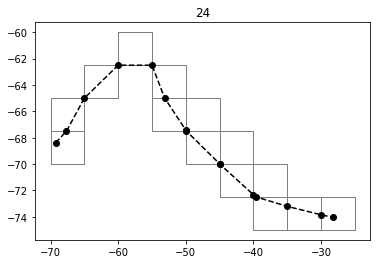

In [58]:
iter=0
nc.pathIter=600
nc.orgDF = copy.deepcopy(nc.CrossingDF)
while iter < nc.pathIter:
    print(iter)
    nc.previousDF = copy.deepcopy(nc.CrossingDF)
    id = 0
    while id <= (len(nc.CrossingDF) - 3):
        nc.triplet = nc.CrossingDF.iloc[id:id+3]
        nc._updateCrossingPoint()
        nc._mergePoint()
        id+=1
    iter+=1

    # Stop optimisation if the points are within some minimum difference
    if iter!=0:
        if len(nc.previousDF) == len(nc.CrossingDF):
            Dist = np.mean(np.sqrt((nc.previousDF['cX'] - nc.CrossingDF['cX'])**2 + (nc.previousDF['cY'] - nc.CrossingDF['cY'])**2))
            print(Dist)
            if Dist < 1e-2:
                break


import matplotlib.pylab as plt
from matplotlib.patches import Polygon as MatplotPolygon

plt.plot(nc.CrossingDF['cX'],nc.CrossingDF['cY'],'k--',marker='o')
# plt.plot(nc.previousDF['cX'],nc.previousDF['cY'],'b--',marker='o')
# plt.plot(nc.orgDF['cX'],nc.orgDF['cY'],'r--',marker='o')

for idx,row in nc.CrossingDF.iterrows():
    cellBox = nc.Mesh.cellBoxes[row.cellStart.name]
    plt.gca().add_patch(MatplotPolygon(cellBox.getBounds(), closed=True, fill=False, color='grey', alpha=1))
    cellBox = nc.Mesh.cellBoxes[row.cellEnd.name]
    plt.gca().add_patch(MatplotPolygon(cellBox.getBounds(), closed=True, fill=False, color='grey', alpha=1))
    plt.title(iter)

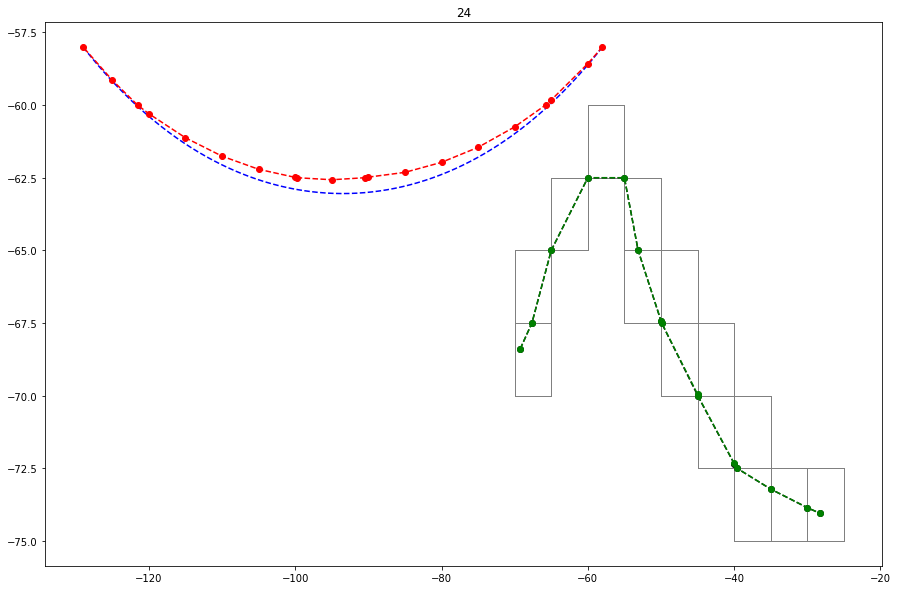

In [59]:
import matplotlib.pylab as plt
from matplotlib.patches import Polygon as MatplotPolygon
import json

def GreatCircle(Start_p,End_p):
    import pyproj
    import numpy as np
    startlong, startlat = Start_p
    endlong, endlat     = End_p

    # calculate distance between points
    g = pyproj.Geod(ellps='WGS84')
    (az12, az21, dist) = g.inv(startlong, startlat, endlong, endlat)

    # calculate line string along path with segments <= 1 km
    lonlats = g.npts(startlong, startlat, endlong, endlat,
                    1 + int(dist / 1000))

    lonlats = np.array(lonlats)

    return lonlats
GC = GreatCircle((-129.0,-58.0),(-58.0,-58.0))

with open('SPSE_geo.json', 'r') as f:
    MPaths = np.array(json.load(f)['features'][0]['geometry']['coordinates'])



fig = plt.figure(figsize=(15,10))
plt.plot(nc.CrossingDF['cX'],nc.CrossingDF['cY'],'k--',marker='o')
plt.plot(nc.previousDF['cX'],nc.previousDF['cY'],'g--',marker='o')

plt.plot(GC[:,0],GC[:,1],'b--')
plt.plot(MPaths[:,0],MPaths[:,1],'r--',marker='o')

for idx,row in nc.CrossingDF.iterrows():
    cellBox = nc.Mesh.cellBoxes[row.cellStart.name]
    plt.gca().add_patch(MatplotPolygon(cellBox.getBounds(), closed=True, fill=False, color='grey', alpha=1))
    cellBox = nc.Mesh.cellBoxes[row.cellEnd.name]
    plt.gca().add_patch(MatplotPolygon(cellBox.getBounds(), closed=True, fill=False, color='grey', alpha=1))
    plt.title(iter)

In [ ]:

nc.CrossingDF.iloc[1]['cellEnd']

In [ ]:
startIndex = np.array([row['cellStart'].name for idx,row in nc.CrossingDF.iterrows()][1:-1])
endIndex   = np.array([row['cellEnd'].name for idx,row in nc.CrossingDF.iterrows()][1:-1] )
print(startIndex,endIndex)

In [ ]:
nc.CrossingDF

startIndex = np.array([row['cellStart'].name for idx,row in nc.CrossingDF.iterrows()][1:-1])
endIndex   = np.array([row['cellEnd'].name for idx,row in nc.CrossingDF.iterrows()][1:-1] )

boolReverseEdge = np.logical_and((startIndex[:-1] == endIndex[1:]),(startIndex[1:] == endIndex[:-1]))
boolReverseEdge = np.logical_or(boolReverseEdge,(endIndex[:-1] == endIndex[1:]))
print(boolReverseEdge)

In [ ]:
print(startIndex)
print(endIndex)

In [ ]:
(endIndex[:-1] == endIndex[1:])

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as MatplotPolygon
iter = 0
nc.pathIter=4000

while iter <= nc.pathIter:
    
    print(iter)
    id = 0
    nc._current_path = copy.copy(nc.path)
    while id <= (len(nc.path) - 3):
        nc.Sp     = tuple(nc.path[id,:])
        nc.Cp     = tuple(nc.path[id+1,:])
        nc.Ep     = tuple(nc.path[id+2,:])

        nc.Sindex = nc.cellIndices[id]
        nc.Eindex = nc.cellIndices[id+1]

        # # # -- Dropping Points that are at the same location --
        # if np.sqrt((nc.Ep[0]-nc.Cp[0])**2 + (nc.Ep[1]-nc.Cp[1])**2) == 0.0:
        #     nc.path        = np.delete(nc.path,id+1,0)
        #     nc.cellIndices = np.delete(nc.cellIndices,id+1,0)  
        #     id+=1 
        #     continue           


        nc.sourceNeighbourIndices = nc.DijkstraInfo.loc[nc.Sindex]
        nc.endNeighbourIndices    = nc.DijkstraInfo.loc[nc.Eindex]

        nc.case = nc.sourceNeighbourIndices['case'][np.where(np.array(nc.sourceNeighbourIndices['neighbourIndex'])==nc.endNeighbourIndices.name)[0][0]]

        Points,Indices = nc._updateCrossingPoint()


        # # -- SmoothingSpecialCase - Reverse Edge
        if (type(Points)==type(None)) and (type(Indices)==type(None)):
            nc.path        = np.delete(nc.path,id,0)
            nc.cellIndices = np.delete(nc.cellIndices,id,0)   
            id+=1
            continue           

        # -- Neglect Path Update if Ice or Land
        Allowed = True
        Boxes = [nc.Mesh.cellBoxes[i] for i in Indices]
        for box in Boxes:
            if box.containsLand() or box.iceArea() >= nc.OptInfo['MaxIceExtent']:
                Allowed = False
        if not Allowed:
            id+=1
            continue 


        # Updating the Indices
        nc.cellIndices[id]   = Indices[0]
        nc.cellIndices[id+1] = Indices[-1]
        if len(Indices) > 2:
            nc.cellIndices = np.insert(nc.cellIndices,id+1,Indices[1:-1],0)


        # Updating the crossing points
        nc.path[id+1,:]      = Points[0,:]
        if Points.shape[0] > 1:
            nc.path        = np.insert(nc.path,id+2,Points[1:,:],0)
        else:
            id+=1



        # print(nc.Sindex,nc.Eindex)
        # fig = plt.figure()
        # plt.scatter(nc.Sp[0],nc.Sp[1],50,'r')
        # plt.scatter(nc.Ep[0],nc.Ep[1],50,'r')
        # plt.scatter(nc.Cp[0],nc.Cp[1],50,'b')
        # for indx in Indices:
        #     plt.gca().add_patch(MatplotPolygon(cellGrid.cellBoxes[indx].getBounds(), closed=True, fill=False, color='grey', alpha=1,linewidth=2.0))
        # plt.scatter(Points[:,0],Points[:,1],5,'k')


        # Check if can update further

        #id+=(len(Indices)-2 + 1)

    iter+=1

    # Stop optimisation if the points are within some minimum difference
    if iter!=0:
        if nc.path.shape == nc._current_path.shape:
            if np.max(np.sqrt((nc.path-nc._current_path)**2)) < 1e-8:
                break


In [ ]:
fig = plt.figure(figsize=(15,10))
plt.plot(nc.CrossingDF['cX'],nc.CrossingDF['cY'],'k--',marker='o')
plt.plot(GC[:,0],GC[:,1],'b--')
plt.plot(MPaths[:,0],MPaths[:,1],'r--',marker='o')

for idx,row in nc.CrossingDF.iterrows():
    cellBox = nc.Mesh.cellBoxes[row.cellStart.name]
    plt.gca().add_patch(MatplotPolygon(cellBox.getBounds(), closed=True, fill=False, color='grey', alpha=1))
    cellBox = nc.Mesh.cellBoxes[row.cellEnd.name]
    plt.gca().add_patch(MatplotPolygon(cellBox.getBounds(), closed=True, fill=False, color='grey', alpha=1))
    plt.title(iter)

In [ ]:
SmoothedPaths = []
Path = copy.copy(TT.paths[ii])
Path['Path']['Points']       = nc.path
SmoothedPaths.append(Path)

In [ ]:

Paths = 




map = Plot.BaseMap(logo=True,logoPos=[5,88])
map = Plot.MapMesh(cellGrid,map,threshold=OptInfo['Route']['MaxIceExtent'])
map = Plot.MapWaypoints(pd.read_csv(OptInfo['Route']['WayPoints']),map)
map = MapMPaths(MPaths,map,PathPoints=True)
map = MapMPaths(GreatCircle((-129.0,-58.0),(-58.0,-58.0)),map,PathPoints=False,color='red')
map = Plot.MapPaths(SmoothedPaths,map,PathPoints=True)
#map = Plot.MapPaths(Paths,map,PathPoints=False)
map = Plot.LayerControl(map,collapsed=True)
map